<h1 style="background-color:#0071BD;color:white;text-align:center;padding-top:0.8em;padding-bottom: 0.8em">
    Regularized Least Squares Optimization
</h1>

Accompanying notebook for the recipe:

  * Christian Bauckhage: "NumPy / SciPy Recipes for Data Science: Regularized Least Squares Optimization", <br/>Technical Report, March 2015 ([Download from ResearchGate](https://www.researchgate.net/publication/274138835_NumPy_SciPy_Recipes_for_Data_Science_Regularized_Least_Squares_Optimization))

  * Abstract of the paper: *In this note, we study the idea of regularized least squares for robust model fitting. That is, we look at how to modify the ordinary least squares approach such that it yields "useful" results even for data sets that are corrupted by outliers.*
  
<p style="background-color:#66A5D1;padding-top:0.2em;padding-bottom: 0.2em" />

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt

In [2]:
import numpy.random as rnd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Solving Regularized Least Squares

In [3]:
def rlsq_solution_V1(X, y, l):
    n, m = X.shape
    I = np.identity(m)
    w = la.inv(X.T.dot(X) + l*I).dot(X.T).dot(y)
    return w

In [4]:
def rlsq_solution_V2(X, y, l):
    w = sla.lsqr(X, y, damp=l)[0]
    return w

In [5]:
def rlsq_solution_V3(X, y, l):
    w = sla.lsmr(X, y, damp=l)[0]
    return w

## Comparison with Ordinary Least Squares

In [6]:
def create_data(n, xmin=-2, xmax=12, a=1.1, b=2.0):
    x = rnd.random(n) * (xmax - xmin) + xmin
    y = a * x + b + rnd.randn(n) * 0.5
    return x, y

In [7]:
x, y = create_data(25)
noise_x, noise_y = create_data(3, 0, 2, 1.1, 7)
x = np.concatenate([x, noise_x])
y = np.concatenate([y, noise_y])

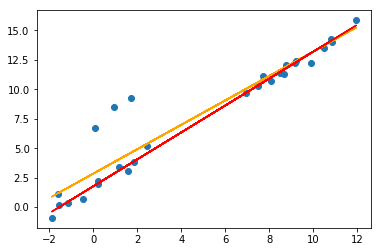

In [8]:
X = np.vander(x, 2)

wo = la.lstsq(X, y        )[0]; yo = X.dot(wo)
wr = sla.lsqr(X, y, damp=3)[0]; yr = X.dot(wr)

plt.plot(x, y, 'o')
plt.plot(x, yo,  '-', color='orange')
plt.plot(x, yr, '-', color='red')
plt.show()

## Performance comparison

In [9]:
import timeit

In [10]:
m = 100
print('m =', m)
print()

print(9*' '+'n', end='')
for v in [1, 2, 3]:
    print(8*' ' + 'V{}'.format(v), end='')
print()

for n in [100, 1_000, 10_000, 100_000, 1_000_000]:
    print('{:10}'.format(n), end='')
    for v in [1, 2, 3]:
        t = timeit.timeit(
            stmt    = 'rlsq_solution_V{}(X, y, 8)'.format(v), 
            setup   = 'X = rnd.randn(n, m); y = rnd.rand(n)', 
            number  = 12, 
            globals = globals()
        )
        print('{:10.3f}'.format(t), end='')
    print()

m = 100

         n        V1        V2        V3
       100     0.011     0.034     0.026
      1000     0.012     0.021     0.017
     10000     0.038     0.018     0.014
    100000     0.554     0.222     0.142
   1000000     5.411     1.349     0.957


In [11]:
n = 100
print('n =', n)
print()

print(9*' '+'m', end='')
for v in [1, 2, 3]:
    print(8*' ' + 'V{}'.format(v), end='')
print()

for m in [100, 1_000, 10_000]:
    print('{:10}'.format(m), end='')
    for v in [1, 2, 3]:
        t = timeit.timeit(
            stmt    = 'rlsq_solution_V{}(X, y, 8)'.format(v), 
            setup   = 'X = rnd.randn(n, m); y = rnd.rand(n)', 
            number  = 12, 
            globals = globals()
        )
        print('{:10.3f}'.format(t), end='')
    print()

n = 100

         m        V1        V2        V3
       100     0.004     0.014     0.012
      1000     0.316     0.022     0.020
     10000   106.741     0.023     0.020


## Comparison of Different Damping Factors

In [12]:
x, y = create_data(25)
noise_x, noise_y = create_data(3, 0, 2, 1.1, 7)
x = np.concatenate([x, noise_x])
y = np.concatenate([y, noise_y])

In [13]:
X = np.vander(x, 2)
wo = la.lstsq(X, y)[0]
yo = X.dot(wo)

lambda =  1


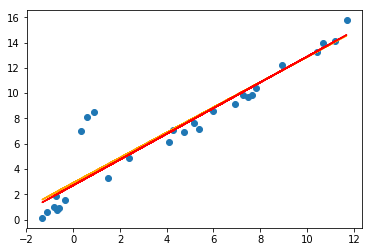

lambda =  2


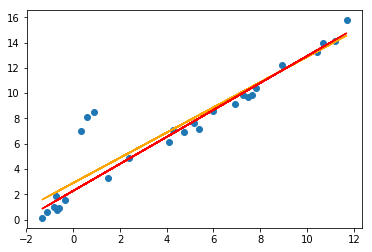

lambda =  4


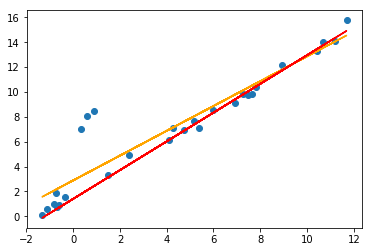

lambda =  8


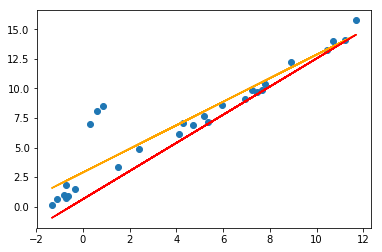

lambda =  16


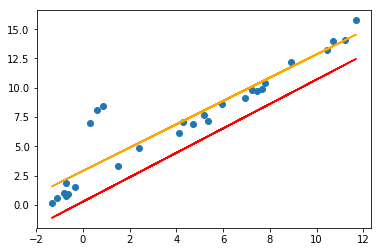

In [14]:
for l in [1, 2, 4, 8, 16]:
    
    wr = sla.lsqr(X, y, damp=l)[0]
    yr = X.dot(wr)
    
    print('lambda = ', l)
    plt.plot(x, y, 'o')
    plt.plot(x, yo,  '-', color='orange')
    plt.plot(x, yr, '-', color='red')
    plt.show()

<table style="width:100%">
  <tr>
      <td colspan="1" style="text-align:left;background-color:#0071BD;color:white">
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">
            <img alt="Creative Commons License" style="border-width:0;float:left;padding-right:10pt"
                 src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" />
        </a>
        &copy; C. Bauckhage and O. Cremers<br/>
        Licensed under a 
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/" style="color:white">
            CC BY-NC 4.0
        </a>.
      </td>
      <td colspan="2" style="text-align:left;background-color:#66A5D1">
          <b>Acknowledgments:</b>
          This material was prepared within the project
          <a href="http://www.b-it-center.de/b-it-programmes/teaching-material/p3ml/" style="color:black">
              P3ML
          </a> 
          which is funded by the Ministry of Education and Research of Germany (BMBF)
          under grant number 01/S17064. The authors gratefully acknowledge this support.
      </td>
  </tr>
</table>